# Analysis of Iris Dataset

The **Iris dataset** is a multivariate dataset introduced by the British statistician and biologist Ronald Fisher in 1936. More information about this can be found on [wikipedia](https://en.wikipedia.org/wiki/Iris_flower_data_set).

## Importing the Libraries
In this section we import all the libraries required for analysis.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

sns.set()

In [2]:
from sklearn.datasets import load_iris

import itertools

In [3]:
# Importing metrics for evaluation
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

from sklearn import model_selection
from sklearn.model_selection import train_test_split

#Importing classification algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.cluster import KMeans

from matplotlib.colors import ListedColormap

from pandas.tools.plotting import scatter_matrix

## Dataset

The dataset contains 150 observations of iris species/classes, 50 samples from each of three species of Iris (*Iris setosa*, *Iris virginica* and *Iris versicolor*). Four features are recorded for each sample: the length and the width of the sepals and petals, in centimeters. 
    
The dataset is publically available at [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Iris). It is also available within the packages scikit-learn and seaborn.

We can import that data in one of the following three ways. We will also rename the columns in each case:

#### 1- From the UCI Machine Learning Repository:

We obtain a dataframe from the dataset as follows:

In [4]:
df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data", header=None, 
                 names=['sepalLength', 'sepalWidth', 'petalLength', 'petalWidth', 'class'])

# if already downloaded in the working directory
#df = pd.read_csv("iris.data", header=None,names=['sepalLength', 'sepalWidth', 'petalLength', 'petalWidth', 'class'])

df.head()

,sepalLength,sepalWidth,petalLength,petalWidth,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


#### 2- From Seaborn package:

We obtain the dataframe from the dataset as follows:

In [5]:
df = sns.load_dataset('iris')
df.columns = ['sepalLength', 'sepalWidth', 'petalLength', 'petalWidth', 'class']
df.head()

,sepalLength,sepalWidth,petalLength,petalWidth,class
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


#### 3- From  scikit-learn package:

In this case we obtain the features and target in separate arrays.

In [6]:
iris = load_iris()

In [7]:
iris.data[:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [8]:
iris.target[:5]

array([0, 0, 0, 0, 0])

## Looking at the data

#### Confirm the number of rows and columns in the dataset:

In [9]:
df.shape

(150, 5)

So the data has 150 rows and 5 columns.

#### Summary Statistics:

In [10]:
df.describe()

,sepalLength,sepalWidth,petalLength,petalWidth
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


#### Information about the data

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepalLength    150 non-null float64
sepalWidth     150 non-null float64
petalLength    150 non-null float64
petalWidth     150 non-null float64
class          150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


#### Check the type of each attribute:

In [12]:
df.dtypes

sepalLength    float64
sepalWidth     float64
petalLength    float64
petalWidth     float64
class           object
dtype: object

#### Check the number of unique classes of Iris:

In [13]:
df['class'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

#### Class distribution

In [14]:
df['class'].value_counts()

virginica     50
versicolor    50
setosa        50
Name: class, dtype: int64

In [15]:
# We can also do the above as follows:
df.groupby('class').size()

class
setosa        50
versicolor    50
virginica     50
dtype: int64

#### Check for missing values in the dataset:

In [16]:
df.isnull().any() # True/False for missing value for each column separately
#df.isnull().values.sum() #Gives total number of missing values
#df.isnull().any().any()  #True if any column has a missing value, False otherwise

sepalLength    False
sepalWidth     False
petalLength    False
petalWidth     False
class          False
dtype: bool

So the dataset does not have any missing values.

## Visualization

#### Boxplots
Draw a boxplot for each numeric variable in a DataFrame:

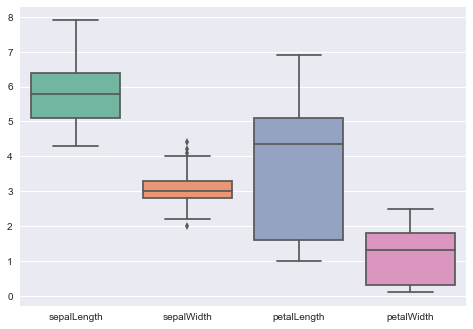

In [17]:
sns.boxplot(data=df, palette="Set2") # palette is to change the default colour scheme
sns.plt.show()
# for horizontal orientation: sns.boxplot(data=df, orient="h")

We can also compare the box plots for each class of Iris, for each numeric variable for each class:

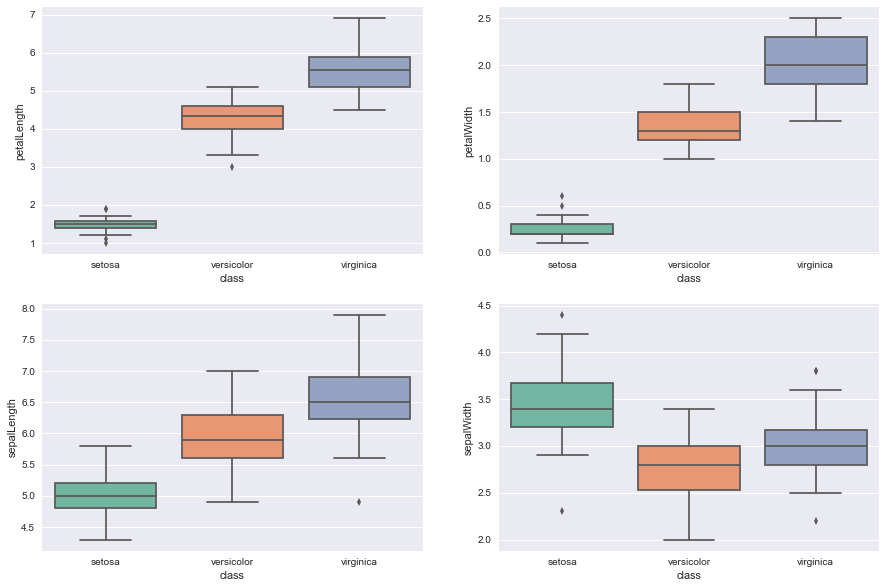

In [18]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.boxplot(x='class',y='petalLength',data=df, palette="Set2")
plt.subplot(2,2,2)
sns.boxplot(x='class',y='petalWidth',data=df, palette="Set2")
plt.subplot(2,2,3)
sns.boxplot(x='class',y='sepalLength',data=df, palette="Set2")
plt.subplot(2,2,4)
sns.boxplot(x='class',y='sepalWidth',data=df, palette="Set2")
sns.plt.show()

#### Violin Plots

Simlarly, we can also have a look at the violin plots for each class of Iris.

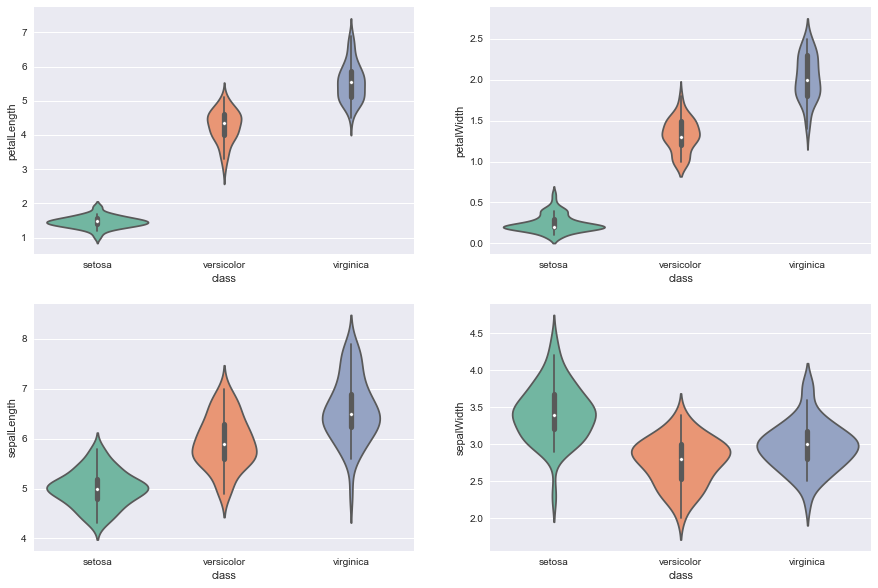

In [19]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.violinplot(x='class',y='petalLength',data=df, palette="Set2")
plt.subplot(2,2,2)
sns.violinplot(x='class',y='petalWidth',data=df, palette="Set2")
plt.subplot(2,2,3)
sns.violinplot(x='class',y='sepalLength',data=df, palette="Set2")
plt.subplot(2,2,4)
sns.violinplot(x='class',y='sepalWidth',data=df, palette="Set2")
sns.plt.show()

#### Histograms
We can also create a histogram of each input variable to get an idea of the distribution.

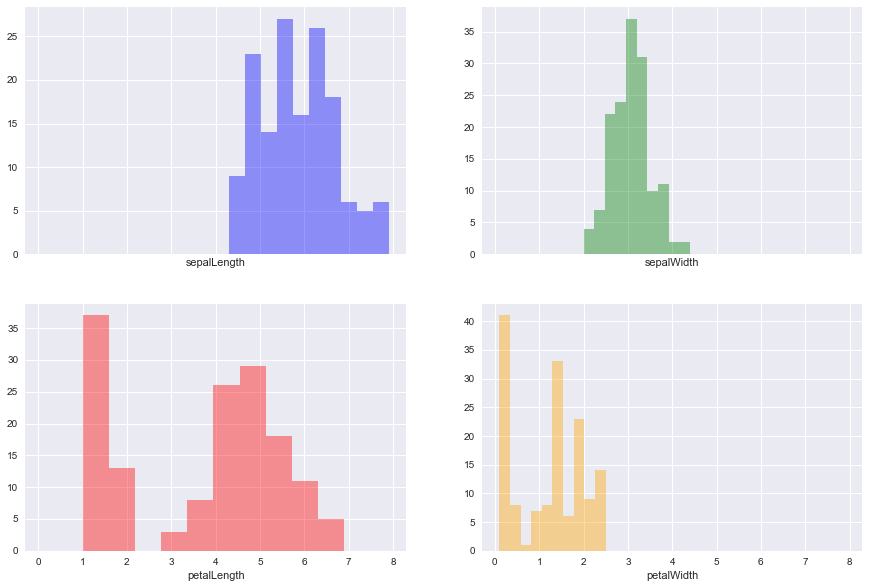

In [20]:
f, axes = plt.subplots(2, 2, figsize=(15, 10), sharex=True)
sns.distplot( df["sepalLength"] , color="blue", ax=axes[0, 0], kde=False, bins=10)
sns.distplot( df["sepalWidth"] , color="green", ax=axes[0, 1], kde=False, bins=10)
sns.distplot( df["petalLength"] , color="red", ax=axes[1, 0], kde=False, bins=10)
sns.distplot( df["petalWidth"] , color="orange", ax=axes[1, 1], kde=False, bins=10)
sns.plt.show()

At first sight, Petal length and petal width seem to diverge from the normal distribution.

#### Scatter Plots

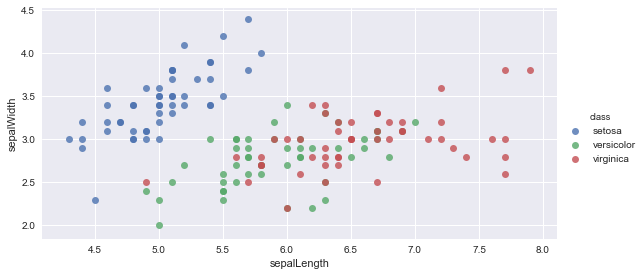

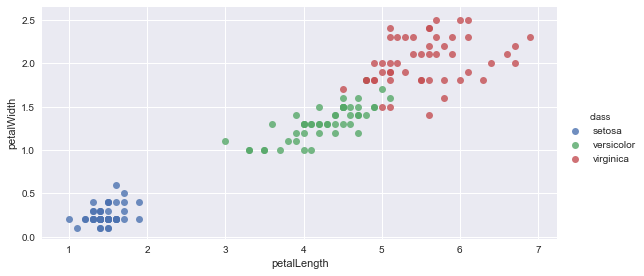

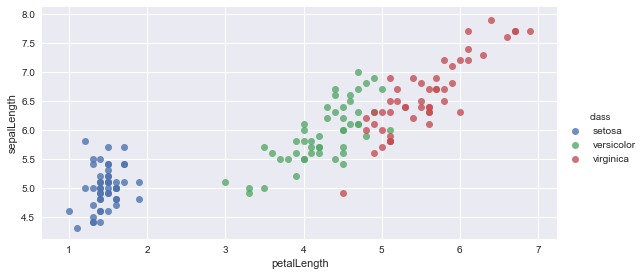

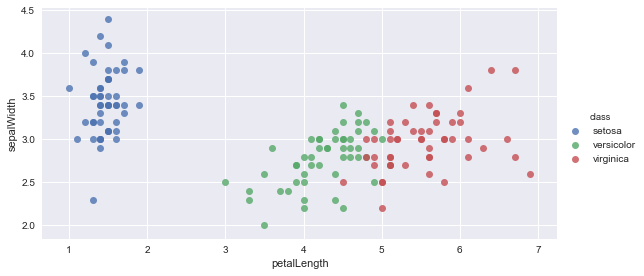

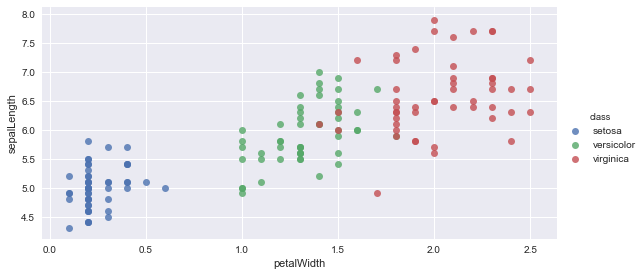

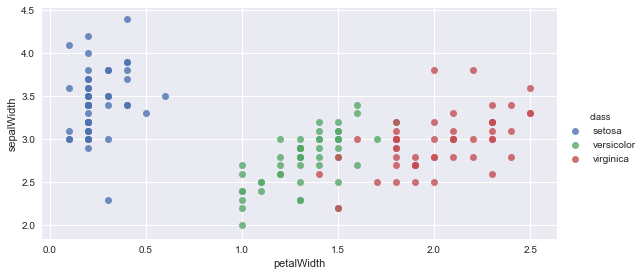

In [21]:
# Create scatterplot of dataframe
sns.lmplot('sepalLength', 'sepalWidth', data=df, fit_reg=False, hue="class", size=4, aspect=2)
sns.lmplot('petalLength', 'petalWidth', data=df, fit_reg=False, hue="class", size=4, aspect=2)
sns.lmplot('petalLength', 'sepalLength', data=df, fit_reg=False, hue="class", size=4, aspect=2)
sns.lmplot('petalLength', 'sepalWidth', data=df, fit_reg=False, hue="class", size=4, aspect=2)
sns.lmplot('petalWidth', 'sepalLength', data=df, fit_reg=False, hue="class", size=4, aspect=2)
sns.lmplot('petalWidth', 'sepalWidth', data=df, fit_reg=False, hue="class", size=4, aspect=2)
sns.plt.show()

From the scatter plot, we can see that the class setosa is separataed from the other two classes across all attributes combinations.

#### Pair Plot

We can also compare scatter plots and histograms using pair plots, and observe the bivariate relation between each pair of attributes/features:

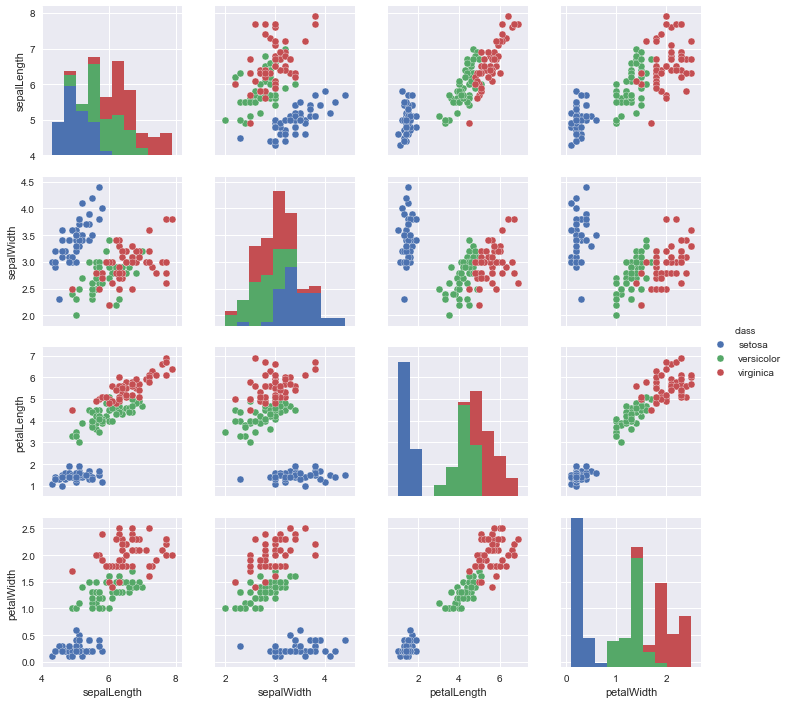

In [22]:
# Using seaborn pairplot to see the bivariate relation between each pair of features
sns.pairplot(df, hue="class")
sns.plt.show()

#### Correlations

We now look at the correlation between each pair of features:

In [23]:
corr = df.corr(method="pearson") #returns a dataframe, so it can be reused. method : {‘pearson’, ‘kendall’, ‘spearman’}
print(corr)

             sepalLength  sepalWidth  petalLength  petalWidth
sepalLength     1.000000   -0.117570     0.871754    0.817941
sepalWidth     -0.117570    1.000000    -0.428440   -0.366126
petalLength     0.871754   -0.428440     1.000000    0.962865
petalWidth      0.817941   -0.366126     0.962865    1.000000


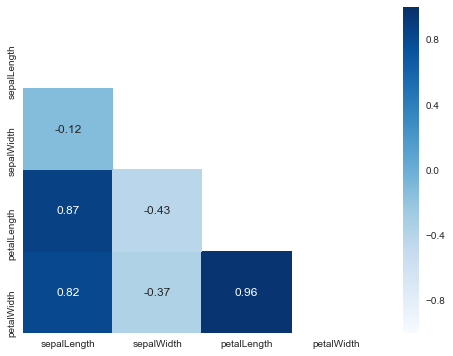

In [24]:
plt.figure(figsize=(8,6)) 
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values, cmap='Blues', 
                annot=True, mask=mask)  #cmap = 'viridis'
sns.plt.show()

According to the correlation matrix results, we see that the petal Length and petal Width have a very high positive correlation which can also be seen in the scatter plots above.

## Modeling and Prediction

**Split the data into train and test sets**

In [25]:
# Seperate the data into dependent and independent variables
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].astype('category').cat.codes.values

# Split the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size = 0.2, random_state = 0)

In [26]:
#Function to plot confusion matrix
def plot_confusion_matrix(cm, classes, normalize=False, cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    
    plt.figure(figsize=(4,3)) 
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
    plt.show()

#### LogisticRegression

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        11
          1       1.00      0.92      0.96        13
          2       0.86      1.00      0.92         6

avg / total       0.97      0.97      0.97        30
 

accuracy is 0.9666666666666667


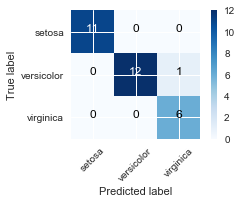

In [27]:
LR_classifier = LogisticRegression()
LR_classifier.fit(X_train, y_train)

y_pred = LR_classifier.predict(X_test)

# Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred), "\n")

# Accuracy score
print('accuracy is', accuracy_score(y_pred,y_test))

#confusion matrix
cm = confusion_matrix(y_test, y_pred)
#plt.figure()
plot_confusion_matrix(cm, classes=df['class'].unique())

#### Naive Bayes

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        11
          1       0.93      1.00      0.96        13
          2       1.00      0.83      0.91         6

avg / total       0.97      0.97      0.97        30
 

accuracy is 0.9666666666666667


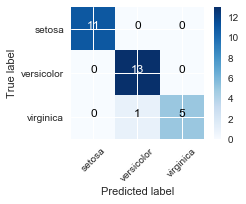

In [28]:
NB_classifier = GaussianNB()
NB_classifier.fit(X_train, y_train)

y_pred = NB_classifier.predict(X_test)

# Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred), "\n")

# Accuracy score
print('accuracy is', accuracy_score(y_pred,y_test))

#confusion matrix
cm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm, classes=df['class'].unique())
plt.show()

#### Support Vector Machine (SVM) 

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        11
          1       1.00      1.00      1.00        13
          2       1.00      1.00      1.00         6

avg / total       1.00      1.00      1.00        30
 

accuracy is 1.0


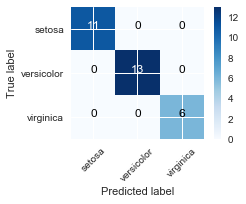

In [29]:
SVM_classifier = SVC()
SVM_classifier.fit(X_train, y_train)

y_pred = SVM_classifier.predict(X_test)

# Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred), "\n")

# Accuracy score
print('accuracy is', accuracy_score(y_pred,y_test))

#confusion matrix
cm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm, classes=df['class'].unique())
plt.show()

#### Decision Tree

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        11
          1       1.00      1.00      1.00        13
          2       1.00      1.00      1.00         6

avg / total       1.00      1.00      1.00        30
 

accuracy is 1.0


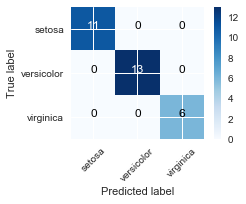

In [30]:
DT_classifier = DecisionTreeClassifier()

DT_classifier.fit(X_train, y_train)

y_pred = DT_classifier.predict(X_test)

# Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred), "\n")

# Accuracy score
print('accuracy is', accuracy_score(y_pred,y_test))

#confusion matrix
cm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm, classes=df['class'].unique())
plt.show()

#### K-Nearest Neighbours

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        11
          1       1.00      1.00      1.00        13
          2       1.00      1.00      1.00         6

avg / total       1.00      1.00      1.00        30
 

accuracy is 1.0


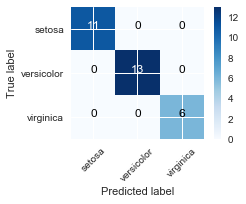

In [31]:
n_nbrs = 8
KNN_classifier = KNeighborsClassifier(n_neighbors=n_nbrs)
KNN_classifier.fit(X_train, y_train)

y_pred = KNN_classifier.predict(X_test)

# Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred), "\n")

# Accuracy score
print('accuracy is', accuracy_score(y_pred,y_test))

#confusion matrix
cm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm, classes=df['class'].unique())
plt.show()

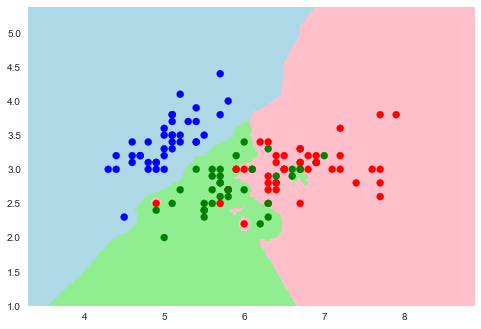

In [32]:
# Take only the first two features for visualization
X1 = X_train[:,:2]
y1 = y_train

# Fit the KNN classifier with the data
KNN_classifier = KNeighborsClassifier(n_neighbors=n_nbrs, weights='distance')
KNN_classifier.fit(X1, y1)

h = .02  # step size

# color maps
cmapLight = ListedColormap(['lightblue', 'lightgreen', 'pink'])
cmapBold = ListedColormap(['blue', 'green', 'red'])

# Plot the decision boundary, by assigning a color to each point in the mesh [x_min, x_max]x[y_min, y_max]
x_min, x_max = X1[:, 0].min() - 1, X1[:, 0].max() + 1
y_min, y_max = X1[:, 1].min() - 1, X1[:, 1].max() + 1
x, y = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
y_pred = KNN_classifier.predict(np.c_[x.ravel(), y.ravel()])

# Put the result into a color plot
y_pred = y_pred.reshape(x.shape)
plt.figure()
plt.pcolormesh(x, y, y_pred, cmap=cmapLight)

# Plot also the training points
plt.scatter(X1[:, 0], X1[:, 1], c = y1, s = 50, cmap = cmapBold)
plt.xlim(x.min(), x.max())
plt.ylim(y.min(), y.max())
plt.show()    

#### KMeans Clustering

In [33]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(X_train)

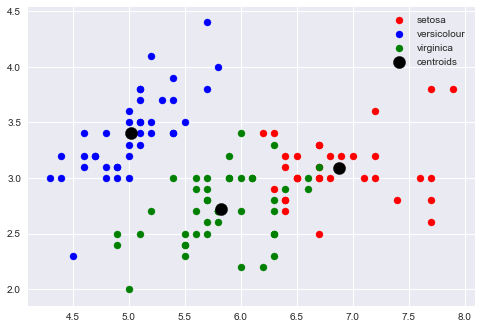

In [34]:
#Visualize the clusters
plt.scatter(X_train[y_kmeans == 0, 0], X_train[y_kmeans == 0, 1], s = 50, c = 'red', label = 'setosa')
plt.scatter(X_train[y_kmeans == 1, 0], X_train[y_kmeans == 1, 1], s = 50, c = 'blue', label = 'versicolour')
plt.scatter(X_train[y_kmeans == 2, 0], X_train[y_kmeans == 2, 1], s = 50, c = 'green', label = 'virginica')

#Plot the centroids
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 150, c = 'black', label = 'centroids')
plt.legend()
plt.show()